## The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2022 Semester 2

## Assignment 2

**Student Name:**    Philipp Habicht

**Student ID:**     1372069

## This iPython notebook is a template which you should use for your Assignment 2 submission. This file should be submitted at the **Assignment 2: Code** link on the LMS.

In addition to this file, you should submit a written report explaining your results at the **Assignment 2: Report** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

### 1. CNN implementation

In this problem, you will implement a CNN to classify the yoga32 dataset. The following code section will load the dataset from a folder that you specify. You may change the batch sizes and validation percentage if you wish, but otherwise it is recommended that you do not modify this section.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import secrets

data_dir = "./yoga32"
train_batch_size = 32
rand_seed = secrets.randbelow(1_000_000_000) # random seed for train/val split
# note that same seed must be used for both to ensure no overlap in train/val data

# Get training images from 'train' directory
train_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/train',
    validation_split=0.2,
    subset="training",
    seed=rand_seed,
    image_size=(32, 32),
    batch_size=train_batch_size)

# Get validation images from 'train' directory
val_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/train',
    validation_split=0.2,
    subset="validation",
    seed=rand_seed,
    image_size=(32, 32),
    batch_size=train_batch_size)

# Output list of class names
class_names = train_data.class_names
print(class_names)

# Note: To train a model with the dataset loaded above, pass the train and val
# datasets to the fit() function, like so:
# myCNNmodel.fit(train_data, validation_data=val_data, epochs=number_of_epochs)

Found 520 files belonging to 10 classes.
Using 416 files for training.
Found 520 files belonging to 10 classes.
Using 104 files for validation.
['bridge', 'childs', 'downwarddog', 'mountain', 'plank', 'seatedforwardbend', 'tree', 'trianglepose', 'warrior1', 'warrior2']


2022-09-09 14:10:02.256741: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print(tf.__version__)

2.9.1


### 1.1. Implement the CNN shown in the assignment specification and train it on the provided dataset. Plot the training accuracy and testing accuracy over epochs.

In [3]:
# Model architecture
cnn = keras.Sequential(
    [
        layers.Input((32, 32, 3)), 
        layers.Rescaling(1/255),
        
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)), 
        
        layers.Conv2D(24, (3,3), activation='relu'),
        layers.Conv2D(24, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)), 
        
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ]
)

In [4]:
# Configure the model
cnn.compile(optimizer='adam',
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
           metrics=['accuracy'])

In [5]:
history_cnn = cnn.fit(train_data, epochs=50, validation_data=val_data)

Epoch 1/50
13/13 [==============================] - 2s 50ms/step - loss: 2.3102 - accuracy: 0.0962 - val_loss: 2.3088 - val_accuracy: 0.0865
Epoch 2/50
13/13 [==============================] - 0s 29ms/step - loss: 2.2874 - accuracy: 0.1394 - val_loss: 2.3033 - val_accuracy: 0.1250
Epoch 3/50
13/13 [==============================] - 0s 28ms/step - loss: 2.2571 - accuracy: 0.1442 - val_loss: 2.2648 - val_accuracy: 0.1346
Epoch 4/50
13/13 [==============================] - 0s 27ms/step - loss: 2.1845 - accuracy: 0.1971 - val_loss: 2.2017 - val_accuracy: 0.1538
Epoch 5/50
13/13 [==============================] - 0s 26ms/step - loss: 2.0067 - accuracy: 0.3510 - val_loss: 2.1250 - val_accuracy: 0.2115
Epoch 6/50
13/13 [==============================] - 0s 27ms/step - loss: 1.7435 - accuracy: 0.4014 - val_loss: 1.8768 - val_accuracy: 0.2788
Epoch 7/50
13/13 [==============================] - 0s 29ms/step - loss: 1.5106 - accuracy: 0.5240 - val_loss: 1.8228 - val_accuracy: 0.3269
Epoch 8/50
13

In [6]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 24)        3480      
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 24)        5208      
                                                        

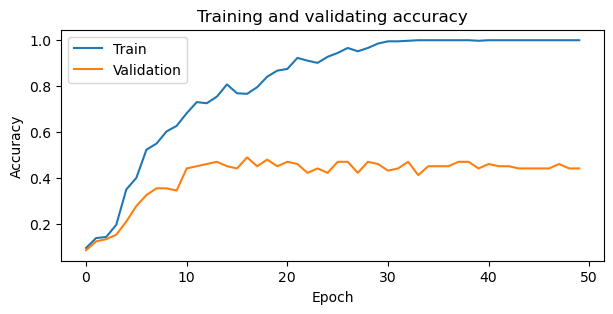

In [7]:
plt.figure(figsize=(7,3))
plt.plot(history_cnn.history['accuracy'], label='Train')
plt.plot(history_cnn.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

### 1.2. Modify the CNN (see assignment spec for details) and train it on the provided dataset.  Plot the training accuracy and testing accuracy over epochs.

In [8]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [9]:
#Apply L1 regularization
cnn_l1 = keras.Sequential(
    [
        layers.Input((32, 32, 3)),
        layers.Rescaling(1/255),
        
        layers.Conv2D(16, (3,3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1(l=0.001)),
        layers.Conv2D(16, (3,3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1(l=0.001)),
        layers.MaxPooling2D((2,2)), 
        
        layers.Conv2D(24, (3,3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1(l=0.001)),
        layers.Conv2D(24, (3,3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1(l=0.001)),
        layers.MaxPooling2D((2,2)), 
        
        layers.Flatten(),
        layers.Dense(10, activation='softmax', kernel_regularizer =tf.keras.regularizers.l1(l=0.001))
    ]
)

In [10]:
# Configure the model
cnn_l1.compile(optimizer='adam',
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
           metrics=['accuracy'])

In [11]:
history_cnn_l1 = cnn_l1.fit(train_data, epochs=50, validation_data=val_data)

Epoch 1/50
13/13 [==============================] - 1s 39ms/step - loss: 3.2736 - accuracy: 0.0721 - val_loss: 3.1901 - val_accuracy: 0.0865
Epoch 2/50
13/13 [==============================] - 0s 28ms/step - loss: 3.1206 - accuracy: 0.1442 - val_loss: 3.0567 - val_accuracy: 0.1250
Epoch 3/50
13/13 [==============================] - 0s 28ms/step - loss: 2.9862 - accuracy: 0.1562 - val_loss: 2.9441 - val_accuracy: 0.0962
Epoch 4/50
13/13 [==============================] - 0s 29ms/step - loss: 2.8593 - accuracy: 0.1755 - val_loss: 2.8197 - val_accuracy: 0.1442
Epoch 5/50
13/13 [==============================] - 0s 27ms/step - loss: 2.6933 - accuracy: 0.2596 - val_loss: 2.6479 - val_accuracy: 0.2212
Epoch 6/50
13/13 [==============================] - 0s 29ms/step - loss: 2.4090 - accuracy: 0.3486 - val_loss: 2.4494 - val_accuracy: 0.2885
Epoch 7/50
13/13 [==============================] - 0s 29ms/step - loss: 2.1515 - accuracy: 0.4207 - val_loss: 2.4408 - val_accuracy: 0.3365
Epoch 8/50
13

In [12]:
# Function for plotting and comparing accuracy tables from different models
def accuracy_plot(model_list, names):
    size = len(model_list)
    fig, axs = plt.subplots(1, size, figsize=(11, 3))
    fig.subplots_adjust(hspace = .5, wspace=.25)
    
    for i in range(size):

        axs[i].plot(model_list[i].history['accuracy'], label='Train')
        axs[i].plot(model_list[i].history['val_accuracy'], label='Validation')
        axs[i].set_title(names[i])
        axs[i].set_ylim(0,1)
        axs[i].set_xlim(0,len(model_list[i].history['accuracy']))
        axs[i].set_ylabel('Accuracy')
        axs[i].set_xlabel('Epoch')
        axs[i].legend(loc='best')

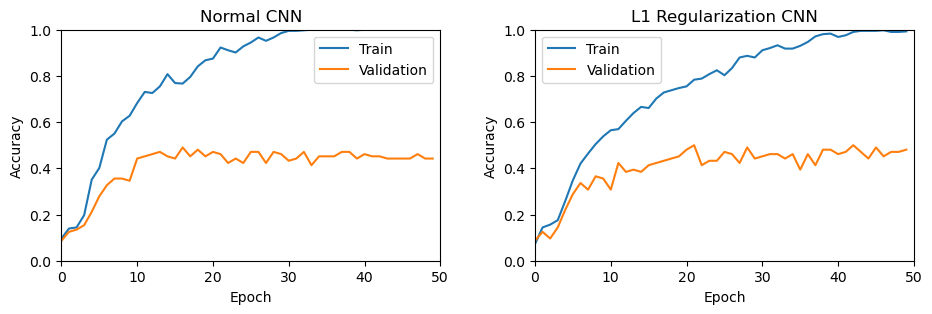

In [13]:
names = ['Normal CNN', 'L1 Regularization CNN']
models = [history_cnn, history_cnn_l1]
accuracy_plot(models, names)

#### 1.2.2 L2 Regularization

In [14]:
#Apply L2 regularization
cnn_l2 = keras.Sequential(
    [
        layers.Input((32, 32, 3)),
        layers.Rescaling(1/255),
        
        layers.Conv2D(16, (3,3), activation='relu', kernel_regularizer =tf.keras.regularizers.l2(l=0.001)),
        layers.Conv2D(16, (3,3), activation='relu', kernel_regularizer =tf.keras.regularizers.l2(l=0.001)),
        layers.MaxPooling2D((2,2)), 
        
        layers.Conv2D(24, (3,3), activation='relu', kernel_regularizer =tf.keras.regularizers.l2(l=0.001)),
        layers.Conv2D(24, (3,3), activation='relu', kernel_regularizer =tf.keras.regularizers.l2(l=0.001)),
        layers.MaxPooling2D((2,2)), 
        
        layers.Flatten(),
        layers.Dense(10, activation='softmax', kernel_regularizer =tf.keras.regularizers.l2(l=0.001))
    ]
)

In [15]:
# Configure the model
cnn_l2.compile(optimizer='adam',
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
           metrics=['accuracy'])

In [16]:
history_cnn_l2 = cnn_l2.fit(train_data, epochs=50, validation_data=val_data)

Epoch 1/50
13/13 [==============================] - 1s 44ms/step - loss: 2.3881 - accuracy: 0.1154 - val_loss: 2.3724 - val_accuracy: 0.1346
Epoch 2/50
13/13 [==============================] - 0s 33ms/step - loss: 2.3429 - accuracy: 0.1779 - val_loss: 2.3555 - val_accuracy: 0.1250
Epoch 3/50
13/13 [==============================] - 0s 33ms/step - loss: 2.2818 - accuracy: 0.1899 - val_loss: 2.2691 - val_accuracy: 0.1827
Epoch 4/50
13/13 [==============================] - 0s 33ms/step - loss: 2.1183 - accuracy: 0.3293 - val_loss: 2.1579 - val_accuracy: 0.2788
Epoch 5/50
13/13 [==============================] - 0s 33ms/step - loss: 1.9244 - accuracy: 0.3606 - val_loss: 2.0681 - val_accuracy: 0.2885
Epoch 6/50
13/13 [==============================] - 0s 32ms/step - loss: 1.7601 - accuracy: 0.4591 - val_loss: 2.0419 - val_accuracy: 0.3365
Epoch 7/50
13/13 [==============================] - 0s 28ms/step - loss: 1.6237 - accuracy: 0.5000 - val_loss: 2.0376 - val_accuracy: 0.2596
Epoch 8/50
13

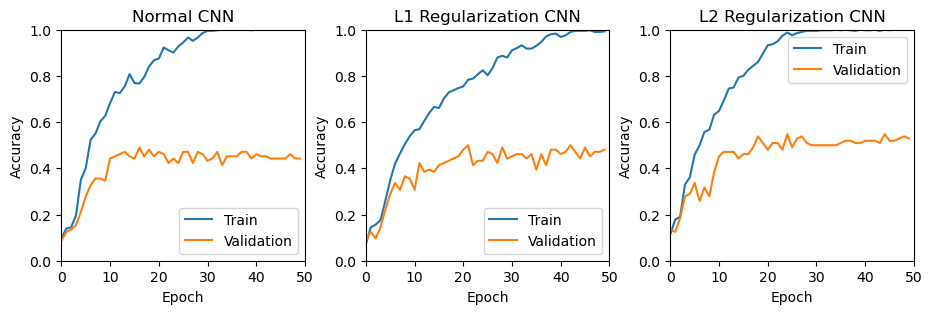

In [17]:
names = ['Normal CNN', 'L1 Regularization CNN', 'L2 Regularization CNN']
models = [history_cnn, history_cnn_l1, history_cnn_l2]
accuracy_plot(models, names)

#### 1.2.3 Dropout

In [18]:
from tensorflow.keras.layers import Dropout

In [19]:
# Model architecture
cnn_drop = keras.Sequential(
    [
        layers.Input((32, 32, 3)), 
        layers.Rescaling(1/255),
        
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)), 
        
        layers.Conv2D(24, (3,3), activation='relu'),
        layers.Conv2D(24, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ]
)

In [20]:
# Configure the model
cnn_drop.compile(optimizer='adam',
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
           metrics=['accuracy'])

In [21]:
history_cnn_drop = cnn_drop.fit(train_data, epochs=50, validation_data=val_data)

Epoch 1/50
13/13 [==============================] - 1s 37ms/step - loss: 2.3079 - accuracy: 0.0865 - val_loss: 2.2995 - val_accuracy: 0.1442
Epoch 2/50
13/13 [==============================] - 0s 27ms/step - loss: 2.2952 - accuracy: 0.1154 - val_loss: 2.2939 - val_accuracy: 0.0865
Epoch 3/50
13/13 [==============================] - 0s 27ms/step - loss: 2.2717 - accuracy: 0.1731 - val_loss: 2.2738 - val_accuracy: 0.1635
Epoch 4/50
13/13 [==============================] - 0s 30ms/step - loss: 2.2145 - accuracy: 0.1851 - val_loss: 2.2257 - val_accuracy: 0.1827
Epoch 5/50
13/13 [==============================] - 0s 33ms/step - loss: 2.1052 - accuracy: 0.2260 - val_loss: 2.0659 - val_accuracy: 0.2692
Epoch 6/50
13/13 [==============================] - 0s 34ms/step - loss: 1.9709 - accuracy: 0.2957 - val_loss: 1.9616 - val_accuracy: 0.3269
Epoch 7/50
13/13 [==============================] - 0s 34ms/step - loss: 1.8232 - accuracy: 0.3750 - val_loss: 1.8529 - val_accuracy: 0.3846
Epoch 8/50
13

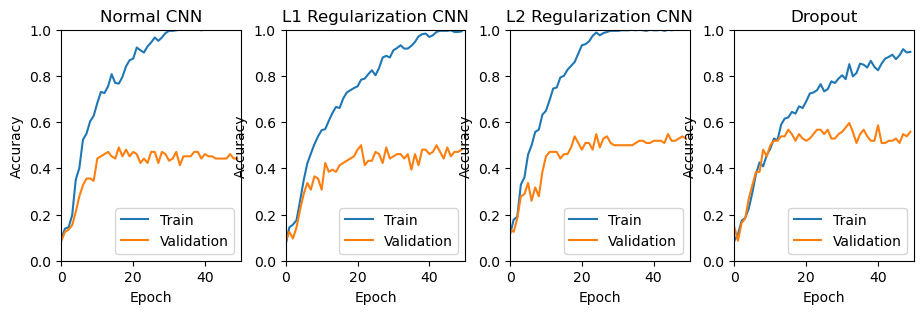

In [22]:
names = ['Normal CNN', 'L1 Regularization CNN', 'L2 Regularization CNN', 'Dropout']
models = [history_cnn, history_cnn_l1, history_cnn_l2, history_cnn_drop]
accuracy_plot(models, names)

#### 1.2.4 Data augmentation

In [23]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
])

In [24]:
# Model architecture
cnn_da = keras.Sequential(
    [ 
        data_augmentation,
        layers.Input((32, 32, 3)), 
        layers.Rescaling(1/255),
        
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)), 
        
        layers.Conv2D(24, (3,3), activation='relu'),
        layers.Conv2D(24, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)), 
        
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ]
)

In [25]:
# Configure the model
cnn_da.compile(optimizer='adam',
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
           metrics=['accuracy'])

In [26]:
history_cnn_da = cnn_da.fit(train_data, epochs=50, validation_data=val_data)

Epoch 1/50
13/13 [==============================] - 1s 39ms/step - loss: 2.3127 - accuracy: 0.1034 - val_loss: 2.2959 - val_accuracy: 0.0962
Epoch 2/50
13/13 [==============================] - 0s 27ms/step - loss: 2.2869 - accuracy: 0.1755 - val_loss: 2.2884 - val_accuracy: 0.1250
Epoch 3/50
13/13 [==============================] - 0s 30ms/step - loss: 2.2555 - accuracy: 0.1803 - val_loss: 2.2561 - val_accuracy: 0.1635
Epoch 4/50
13/13 [==============================] - 0s 30ms/step - loss: 2.1805 - accuracy: 0.2380 - val_loss: 2.2094 - val_accuracy: 0.2308
Epoch 5/50
13/13 [==============================] - 0s 30ms/step - loss: 2.0584 - accuracy: 0.2837 - val_loss: 2.0515 - val_accuracy: 0.2308
Epoch 6/50
13/13 [==============================] - 0s 30ms/step - loss: 1.8594 - accuracy: 0.3486 - val_loss: 1.9626 - val_accuracy: 0.2981
Epoch 7/50
13/13 [==============================] - 0s 32ms/step - loss: 1.7074 - accuracy: 0.4471 - val_loss: 1.9287 - val_accuracy: 0.3462
Epoch 8/50
13

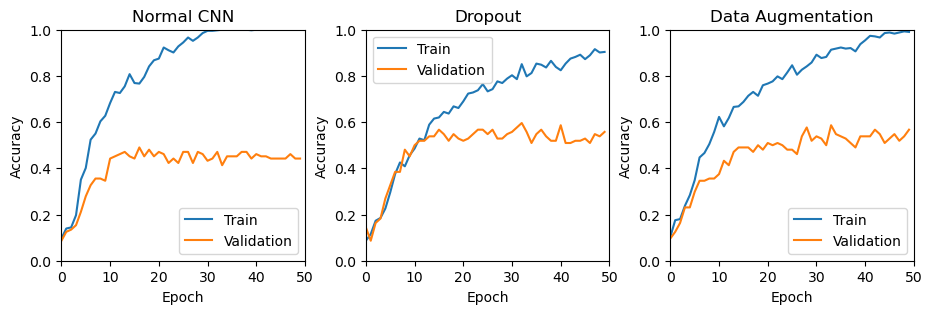

In [27]:
names = ['Normal CNN', 'Dropout', 'Data Augmentation']
models = [history_cnn, history_cnn_drop, history_cnn_da]
accuracy_plot(models, names)

#### 1.2.5 Combination

In [176]:
cnn_combi = keras.Sequential(
    [ 
        data_augmentation,
        layers.Input((32, 32, 3)), 
        layers.Rescaling(1/255),
        
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)), 
        
        layers.Conv2D(24, (3,3), activation='relu'),
        layers.Conv2D(24, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)), 
        
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ]
)

In [177]:
# Configure the model
cnn_combi.compile(optimizer='adam',
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
           metrics=['accuracy'])

In [178]:
history_cnn_combi = cnn_combi.fit(train_data, epochs=50, validation_data=val_data)

Epoch 1/50
17/17 [==============================] - 2s 67ms/step - loss: 2.3842 - accuracy: 0.0173 - val_loss: 2.3021 - val_accuracy: 0.1538
Epoch 2/50
17/17 [==============================] - 1s 37ms/step - loss: 2.3221 - accuracy: 0.0615 - val_loss: 2.2995 - val_accuracy: 0.1250
Epoch 3/50
17/17 [==============================] - 1s 40ms/step - loss: 2.3032 - accuracy: 0.0923 - val_loss: 2.3011 - val_accuracy: 0.1250
Epoch 4/50
17/17 [==============================] - 1s 35ms/step - loss: 2.3032 - accuracy: 0.0827 - val_loss: 2.3012 - val_accuracy: 0.1346
Epoch 5/50
17/17 [==============================] - 1s 37ms/step - loss: 2.3031 - accuracy: 0.1077 - val_loss: 2.3011 - val_accuracy: 0.2019
Epoch 6/50
17/17 [==============================] - 1s 44ms/step - loss: 2.3039 - accuracy: 0.1173 - val_loss: 2.3003 - val_accuracy: 0.1923
Epoch 7/50
17/17 [==============================] - 1s 44ms/step - loss: 2.2990 - accuracy: 0.1058 - val_loss: 2.2983 - val_accuracy: 0.1058
Epoch 8/50
17

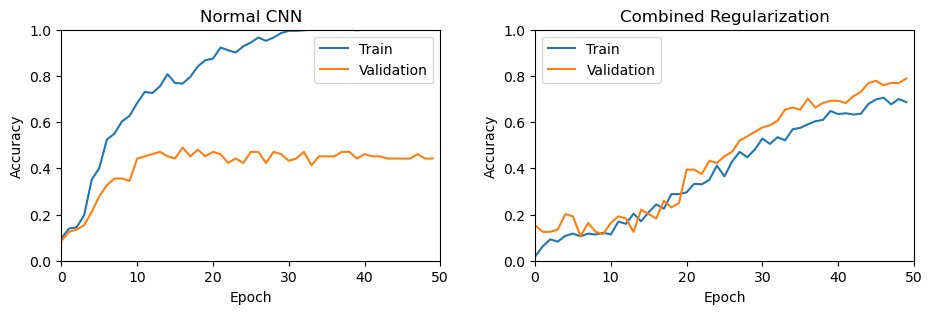

In [179]:
names = ['Normal CNN', 'Combined Regularization']
models = [history_cnn, history_cnn_combi]
accuracy_plot(models, names)

In [180]:
# Evaluate the loss and accuracy
accuracy = cnn_combi.evaluate(val_data)

# Print the accuracy
print("Accuracy: " + str(accuracy))

4/4 [==============================] - 0s 8ms/step - loss: 0.6232 - accuracy: 0.7885
Accuracy: [0.6232424378395081, 0.7884615659713745]


### 2. Error anaylsis
Evaluate your CNN model from question 1.2 on the test dataset. See assignment spec for details.

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import seaborn as sn

In [186]:
# Getting the test data
data_dir = "./yoga32"
test_batch_size = 32

# Get training images from 'test' directory
test_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/test',
    validation_split=None,
    shuffle = False, 
    seed=rand_seed,
    image_size=(32, 32),
    batch_size=test_batch_size)

Found 70 files belonging to 10 classes.


In [187]:
# Getting predictions
predictions = cnn_combi.predict(test_data)

3/3 [==============================] - 0s 10ms/step


In [190]:
# Evaluate the loss and accuracy
accuracy = cnn_combi.evaluate(test_data)

# Print the accuracy
print("Accuracy: " + str(accuracy))

3/3 [==============================] - 0s 16ms/step - loss: 1.2689 - accuracy: 0.6143
Accuracy: [1.2688828706741333, 0.6142857074737549]


In [191]:
# Getting names
names = test_data.class_names

In [192]:
# Getting predicted labels
predicted_classes = predictions.argmax(axis=-1)

In [193]:
# Getting true labels
test = test_data.unbatch()
labels_test = list(test.map(lambda x, y: y))
labels = np.array(labels_test)

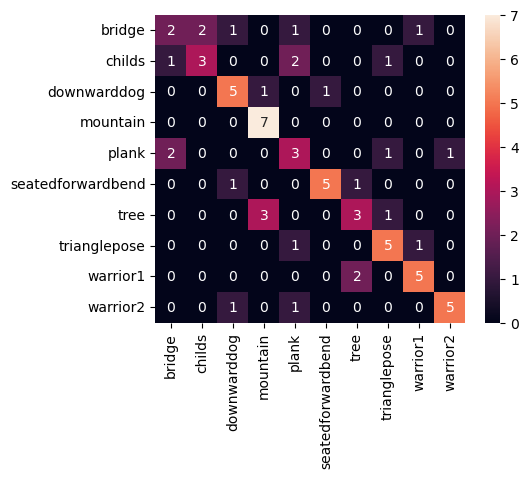

In [194]:
# Confusion matrix
cm = confusion_matrix(labels, predicted_classes)

df_cm = pd.DataFrame(cm, index = [i for i in names], columns = [i for i in names])
plt.figure(figsize = (5,4))
sn.heatmap(df_cm, annot=True);

In [195]:
# Accuracy for classes
class_acc = cm.diagonal()/cm.sum(axis=1)
df_acc = pd.DataFrame({'Names': names, 'Accuracy':class_acc})
df_acc

,Names,Accuracy
0,bridge,0.285714
1,childs,0.428571
2,downwarddog,0.714286
3,mountain,1.000000
4,plank,0.428571
5,seatedforwardbend,0.714286
6,tree,0.428571
7,trianglepose,0.714286
8,warrior1,0.714286
9,warrior2,0.714286


In [196]:
# Unbatch test data for visualization
test_unbatched_x = list(test_data.unbatch().map(lambda x, y: x))
test_unbatched_y = list(test_data.unbatch().map(lambda x, y: y))

In [197]:
def show_image(unbatched, list_numbers):
    
    # Transforming each pic to plot it
    transformed_list = []
    
    for i in list_numbers: 

        transformed_list.append(unbatched[i].numpy().astype(int))

    # Plotting the transformed values
    plt.figure(figsize = (5,5))
    size = len(transformed_list)
        
    for i in range(size):
        plt.subplot(1, size, i+1)
        plt.imshow(transformed_list[i])
        plt.axis('off')
        plt.show()

In [198]:
# Getting indices of plank and bridge
plank = names.index("plank")
bridge = names.index("bridge")

# Getting array of test labels
test_labels = []
for i in range(len(test_unbatched_y)):
    test_labels.append(test_unbatched_y[i].numpy().astype(int))
test_labels = np.array(test_labels)

# Getting indices of plank and bridge in test set
plank_test = np.where(test_labels == plank)[0]
bridge_test = np.where(test_labels == bridge)[0]

Plank images
Prediction of the test images: [4 7 0 9 4 4 0]


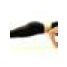

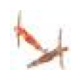

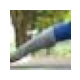

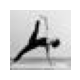

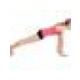

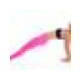

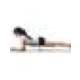

In [199]:
# Visualize plank images
print('Plank images')
print(f'Prediction of the test images: {predicted_classes[plank_test]}')
show_image(test_unbatched_x, plank_test)

Plank images
Prediction of the test images: [0 8 4 1 0 2 1]


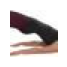

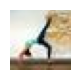

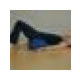

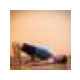

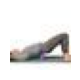

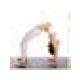

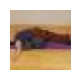

In [200]:
# Visualize bridge images
print('Plank images')
print(f'Prediction of the test images: {predicted_classes[bridge_test]}')
show_image(test_unbatched_x, bridge_test)

### 3. Visualisation
Visualise the feature space that your model uses to classify images. See assignment spec for details.

In [45]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from scipy.spatial.distance import cdist

In [52]:
# Unshuffle training set for plotting reasons
data_dir = "./yoga32"
train_batch_size = 32
rand_seed = secrets.randbelow(1_000_000_000) # random seed for train/val split

# Get training images from 'train' directory
train_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/train',
    shuffle=False,
    seed=rand_seed,
    image_size=(32, 32),
    batch_size=train_batch_size)

Found 520 files belonging to 10 classes.


In [53]:
# Showing model layers
cnn_combi.layers

In [54]:
# Building model for flattened vector outputs
model = Model(inputs=cnn_combi.inputs, outputs=cnn_combi.layers[-3].output)

# Getting flattened vectors from train and test data
test = model.predict(test_data)
train = model.predict(train_data)

17/17 [==============================] - 1s 33ms/step


In [55]:
print(test.shape)
print(train.shape)

(70, 600)
(520, 600)


In [56]:
# Calculating euclidean distance
euclidean = cdist(train,test)

In [57]:
euclidean.shape

(520, 70)

In [58]:
# Function to find nearest neighbors between test and train images
def nearest_neighbor(euclidean_matrix, number_nn):

    nn = list()

    for col in euclidean.T: 
        nn.append(np.argpartition(col,number_nn)[:number_nn])
    
    return nn

In [59]:
# Apply function to get the 5 nearest neighbors 
# Output: For one flattened test image vector you get 5 nearest neighbor flattened vectors from train set
nn = nearest_neighbor(euclidean, 5)

In [114]:
# Unbatch train data for visualization
train_unbatched_x = list(train_data.unbatch().map(lambda x, y: x))
train_unbatched_y = list(train_data.unbatch().map(lambda x, y: y))

In [133]:
# Getting array of train labels
train_labels = []
for k in range(len(train_unbatched_y)):
    train_labels.append(train_unbatched_y[k].numpy().astype(int))
train_labels = np.array(train_labels)

In [163]:
# Plotting 5 nearest neighbours train images from test image 10
def show_feature_space(test, train, num):
    print('Test data image')
    print(f'True label of the image: {labels[num]}')
    show_image(test, [num])

    print('5 closest images from training set')
    print(f'True label of the image: {train_labels[nn[num]]}')
    show_image(train, nn[num])

Test data image
True label of the image: 0


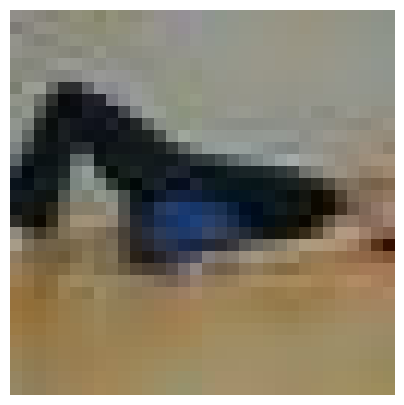

5 closest images from training set
True label of the image: [8 4 5 6 1]


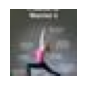

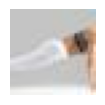

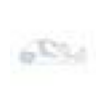

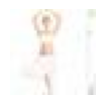

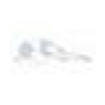

In [203]:
show_feature_space(test_unbatched_x, train_unbatched_x, 2)

Test data image
True label of the image: 0


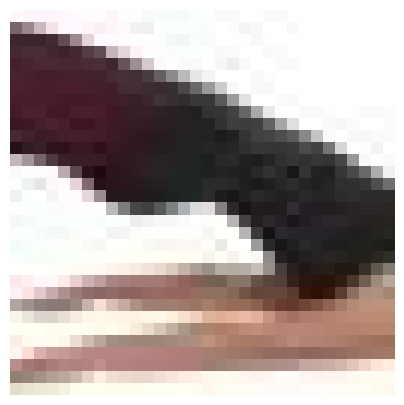

5 closest images from training set
True label of the image: [1 0 1 5 5]


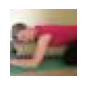

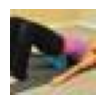

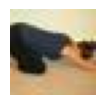

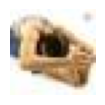

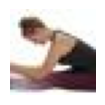

Test data image
True label of the image: 1


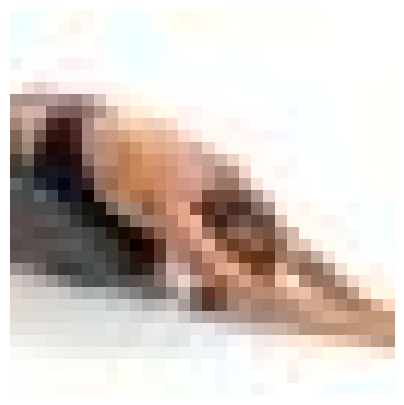

5 closest images from training set
True label of the image: [1 5 6 5 1]


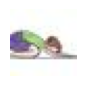

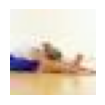

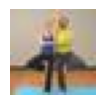

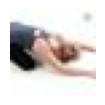

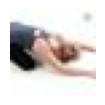

Test data image
True label of the image: 2


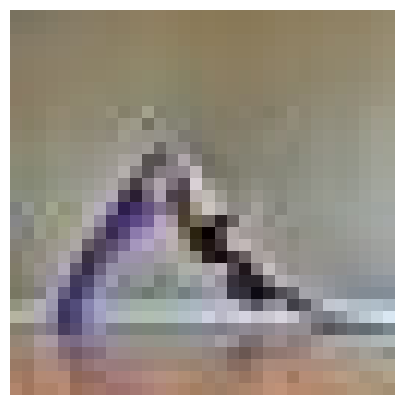

5 closest images from training set
True label of the image: [8 2 8 3 7]


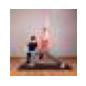

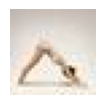

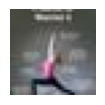

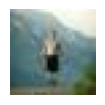

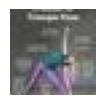

Test data image
True label of the image: 3


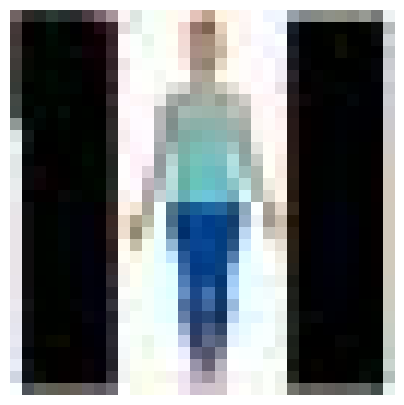

5 closest images from training set
True label of the image: [3 3 3 3 3]


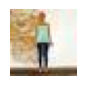

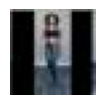

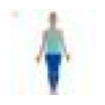

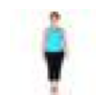

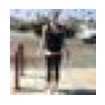

Test data image
True label of the image: 4


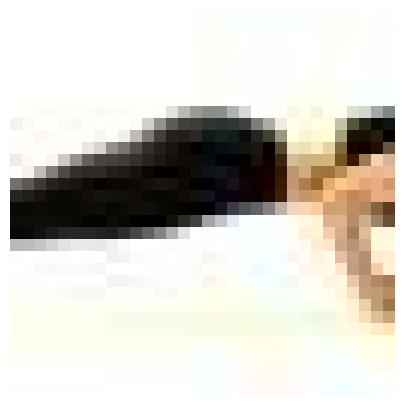

5 closest images from training set
True label of the image: [4 4 0 5 4]


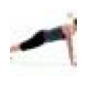

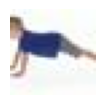

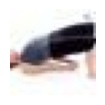

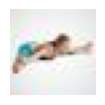

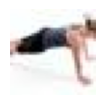

Test data image
True label of the image: 5


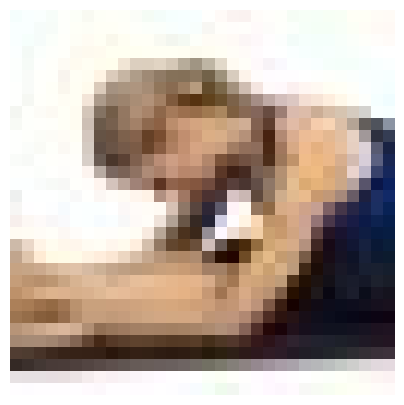

5 closest images from training set
True label of the image: [7 2 6 5 5]


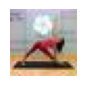

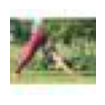

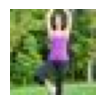

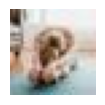

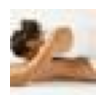

Test data image
True label of the image: 6


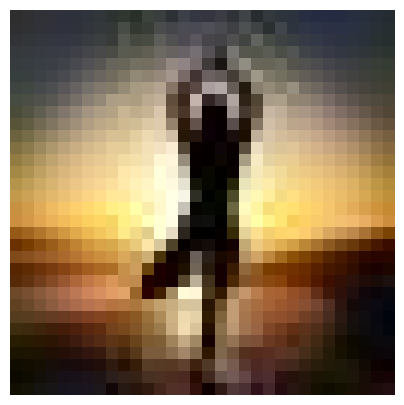

5 closest images from training set
True label of the image: [3 9 6 8 6]


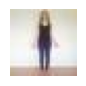

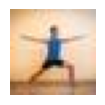

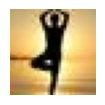

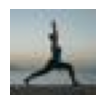

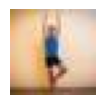

Test data image
True label of the image: 7


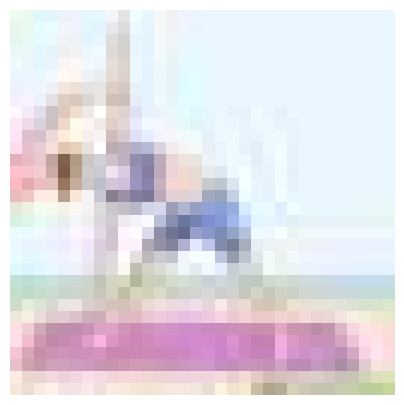

5 closest images from training set
True label of the image: [7 1 8 6 5]


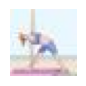

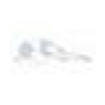

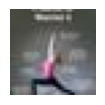

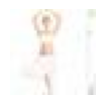

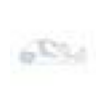

Test data image
True label of the image: 8


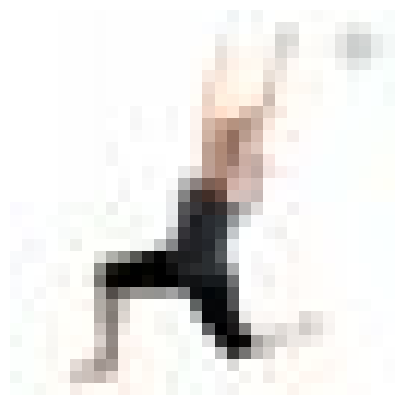

5 closest images from training set
True label of the image: [6 8 8 3 6]


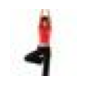

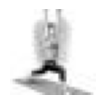

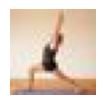

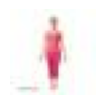

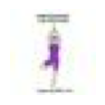

Test data image
True label of the image: 9


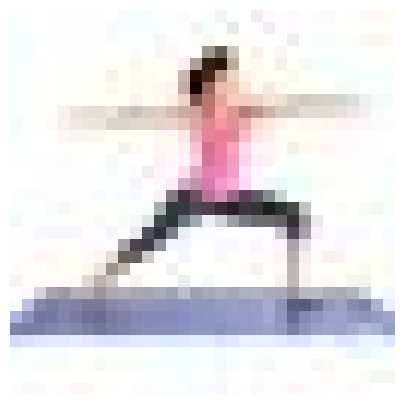

5 closest images from training set
True label of the image: [7 2 4 2 2]


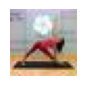

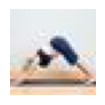

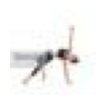

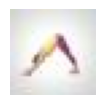

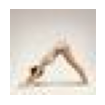

In [172]:
for k in np.arange(0,70,7):
    show_feature_space(test_unbatched_x, train_unbatched_x, k)